<AxesSubplot:title={'center':'Detrended'}>

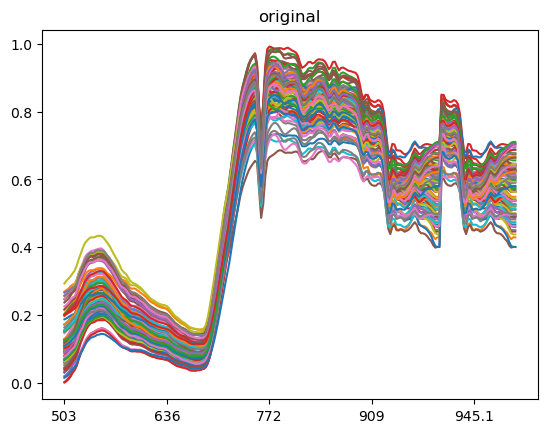

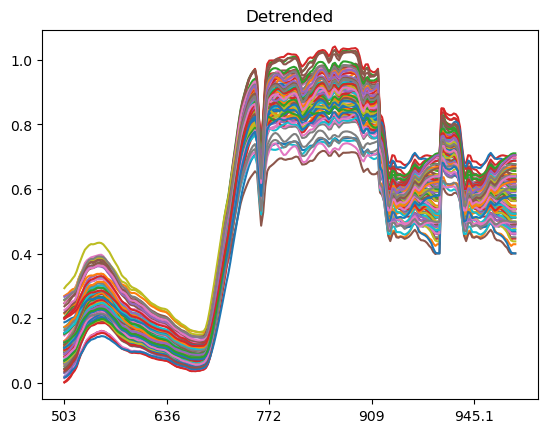

In [43]:
import numpy as np
import pandas  as pd
class SpectralDataProcessor:
    def __init__(self, min_wavelength=769, max_wavelength=923):
        """Initialize the processor with a specified wavelength range."""
        self.min_wavelength = min_wavelength
        self.max_wavelength = max_wavelength
        self.start, self.end= 0,0
    def filter_data(self, data):
        """Filter columns by wavelength range."""
        wavelengths = np.array([num for num in data.columns if isinstance(num, (int,float))])
        
        self.start,self.end= np.argmin(abs(wavelengths-self.min_wavelength)),np.argmin(abs(wavelengths-self.max_wavelength))
        
        return data.iloc[:,self.start:self.end]
    
    def calculate_and_detrend(self, data):
        """Calculate the slope for each row and detrend the data."""
        slopes = data.apply(lambda row: np.polyfit(np.arange(len(row)), row.values, 1)[0], axis=1)
        detrended = data.apply(lambda row: row - slopes.loc[row.name] * np.arange(len(row)), axis=1)
        return detrended

    def process(self, data):
        """Process data through the full pipeline of filtering, detrending, and combining."""
        # Step 1: Filter data
        filtered_data = self.filter_data(data)
        
        # Step 2: Calculate slopes and detrend
        detrended_data = self.calculate_and_detrend(filtered_data)
        
        # Step 3: Combine original and detrended data
        
        combined_data = data.copy()
        combined_data.iloc[:,self.start:self.end] =  detrended_data
        
        return combined_data

# Creating an instance of SpectralDataProcessor and processing the data

processor = SpectralDataProcessor()
data_path='results_ref.xlsx'
data=pd.read_excel(data_path)
data.iloc[:,1:].T.plot(legend=False,title='original')
processed_data= processor.process(data)
processed_data.iloc[:,1:].T.plot(legend=False,title='Detrended')